## Problem 1

```
Imagine that you have the following scenario: you have a file containing some text, in case the text contains the word "error", you want to log it as an error (in a certain way that you can decide), otherwise, if the text contains the word "file", you should log something in a new file (again, you can decide hot to structure the log), otherwise, if its not one of the 2 cases, you need to log something in the console (again, you can decide hot to structure the log). The actions of logging can be simple print statements, they just need to be different for error logs console logs and file logs. You need to implement this logic using chain of responsibility design pattern and classes of your choice. Use the diagram below as a guide.
```

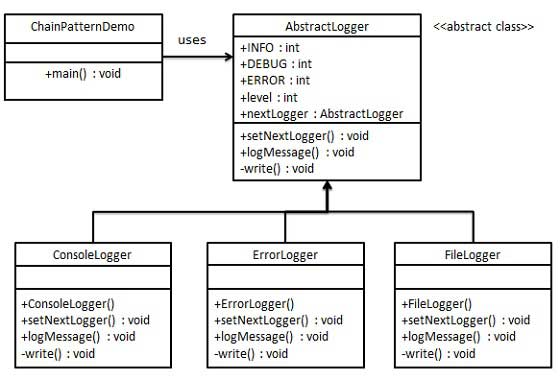

In [14]:
class AbstractHandler(object):
  
    def __init__(self, nxt):
  
        self._nxt = nxt
  
    def handle(self, request):
  
        handled = self.processRequest(request)
  
        if not handled:
            self._nxt.handle(request)
  
    def processRequest(self, request):
  
        raise NotImplementedError('First implement it!')
  
  
class FirstConcreteHandler(AbstractHandler):
  
    def processRequest(self, request):
  
        if 'error' in request: 
            print("error")
            return True
  
  
class SecondConcreteHandler(AbstractHandler):
  
    def processRequest(self, request):
  
      if   'file' in request: 
            print("file")
            return True

  
class DefaultHandler(AbstractHandler):
  
    def processRequest(self, request):
  
        print("This is {} telling you that request '{}' has no handler right now.".format(self.__class__.__name__,
                                                                                          request))
        return True
  
  
class User:
  
    def __init__(self):

        initial = None
  
        self.handler = FirstConcreteHandler(SecondConcreteHandler(DefaultHandler(initial)))
  
    def agent(self, user_request):

            self.handler.handle(user_request)
            

user1 = User()
string = "Hello! My name is Tom Riddle"
user1.agent(string)


user2 = User()
string = "Hello! There is an error"
user2.agent(string)

This is DefaultHandler telling you that request 'Hello! My name is Tom Riddle' has no handler right now.
error


## Problem 2

```
Imagine that you have customers with different orders, a waiter and a cook. Use command design pattern and classes of your choice to implenent this logic. You can use the diagram below as a guide. 
```

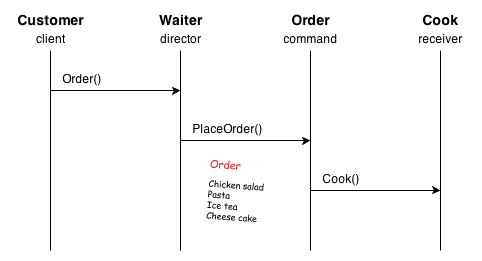

In [2]:
from abc import ABC, abstractmethod

class Command(ABC):
      
    def __init__(self, receiver):
        self.receiver = receiver
      
    def process(self):
        pass

    
class CommandImplementation(Command):
      
    def __init__(self, receiver):
        self.receiver = receiver
  
    def process(self):
        self.receiver.perform_action()
  

class Order:
      
    def perform_action(self):
        print('Ordered')
        
        
class Waiter:
      
    def perform_action(self):
        print('The order is placed')
  

class Cook:
      
    def perform_action(self):
        print('Cooked')
        

class Invoker:
      
    def command(self, cmd):
        self.cmd = cmd
  
    def execute(self):
        self.cmd.process()
  

      
receiver = Order()
cmd = CommandImplementation(receiver)
invoker = Invoker()
invoker.command(cmd)
invoker.execute()

receiver = Waiter()
cmd = CommandImplementation(receiver)
invoker = Invoker()
invoker.command(cmd)
invoker.execute()

receiver = Cook()
cmd = CommandImplementation(receiver)
invoker = Invoker()
invoker.command(cmd)
invoker.execute()

Ordered
The order is placed
Cooked


## Problem 3

```
Imagine that you have different chat rooms and different users who can become members of one or multiple chat rooms. Create a system with such possibilities using a mediator design pattern. You can use the diagram below as a guide. 
```

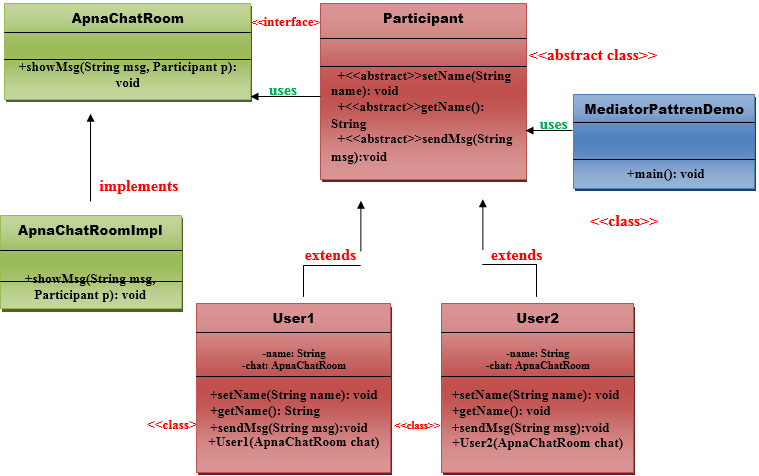

In [5]:
class Server(object):
  
    def displayChat(self, user, chat):
        print("[{} is in the]: {}".format(user, chat))
  
  
class User(object):
  
    def __init__(self, name):
        self.name = name
        self.chat = Server()
  
    def send_to_chat(self, chat):
        self.chat.displayChat(self, chat)
  
    def __str__(self):
        return self.name

  
anna = User('Anna')  
irina = User('Irina') 


anna.send_to_chat("chat room 1")
irina.send_to_chat("chat room 2")

[Anna is in the]: chat room 1
[Irina is in the]: chat room 2
